<a href="https://colab.research.google.com/github/VectorJamo/ML-Algorithms-From-Scratch/blob/main/Logistic_Regression_From_Ground_Up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Implementing Logistic Regression from Scratch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Logistic regression, despite its name, is a binary classification algorithm (0 and 1).
It takes a data example(a feature vector) and maps it into a value ranging from 0 to 1.
The mapped value is the probability that the feature vector is in the positive class(1).
So, if mapped value > 0.5, then the class is positive(1), else the class is negative(0).

We need a function that takes any input and maps it to (0, 1).
The most commonly used function for this task is the sigmoid function.
If we choose the right weights and biases, we can interpret this output as a probability
that the feature vector is in the positive class(1). We will do this by specifing a cost function that measures the likelihood that the model
predicts a value that is of the correct label specified in the dataset.
Then, we find those Ws and Bs for which the cost function (likelihood function) is maximized.

Logistic Regression works similar to SVMs. When we train the model to find the appropriate weights and biases, we are finding the optiminal parameters for the equation of a hyperplane(a line for 2D feature vector, a plane for 3D feature vector and so on). The data points above this hyperplane will be +ve and below will be -ve. The sigmoid function will then map the -ve values to have a probability of below 0.5 and the +ve values to have a probability of above 0.5.

**Here is an example of how the sigmoid function maps any real value to a probability of 0 to 1**

In [138]:
def sigmoid_function(x):
  e = 2.71828
  return (1 / (1 + e**(-x)))

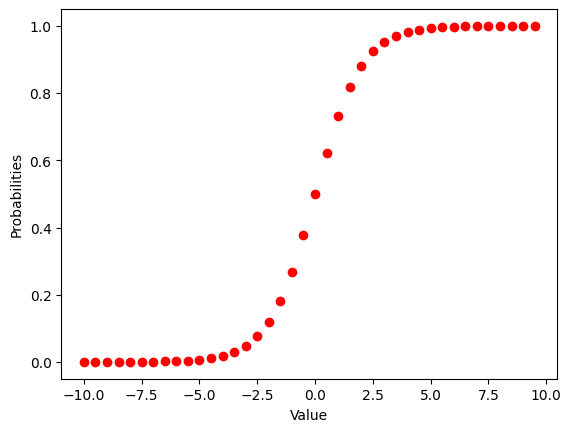

In [139]:
x = np.arange(start=-10, stop=10, step=0.5)
y = sigmoid_function(x)
y
plt.xlabel('Value')
plt.ylabel('Probabilities')
plt.scatter(x=x, y=y, c='red')

**Implementing Logistic Regression**

The equation of the linear decision hyperplane for logistic regression is in the form of `x1*w1 + x2*w2 + x3*w3 + ...... + b = 0`

For 2D feature vectors, this is just an equation of a line `x1*w1 + x2*w2 + b = 0`

For 3D feature vectors, this is just an equation of a plane `x1*w1 + x2*w2 + x3*w3 + b = 0`

For n-dimensional feature vectors, the equation of the n-dimensional hyperplane is, `x1*w1 + ..... + xn*wn + b = 0`

In all these cases, all you do is **take the dot product of the feature vector and the weight vector and then add the bias term**. If the output of this computation is positive, the model has predicted that the given feature vector lies in the positive class (1) and negative output corresponds to the negative class (0).

During training however, we wish to minimize the negative of the log likelihood function (called as log loss or the binary cross entropy loss). To do this, we need to map the output of the above computation to a value between (0, 1) so that it can be interpreted as a probablity that the given feature vector likes in the positive class. To do this mapping, we will use the sigmoid function.

In [140]:
class LogisticRegression():
  def __init__(self, feature_vectors, labels, random_seed=None):
    self.feature_vectors = feature_vectors
    self.labels = labels
    self.current_seed = 42 if random_seed == None else random_seed
    np.random.seed(random_seed)

    self.weights = np.random.rand(len(feature_vectors[0]))
    self.bias = np.random.rand()

    self.log_rate = 10 # Log losses every 10 rounds
    self.losses = {} # Key: Round, Value: Loss

  # Get the prediction probability for a single training example
  def predict(self, feature_vector):
    # Predict using current model's parameters
    prediction = np.dot(feature_vector, self.weights) + self.bias
    return self.sigmoid(prediction)

  # Compute the loss for a single training example
  def compute_loss(self, pred_prob, actual_label):
    # In logistic regression, the loss function used is the binary cross entropy loss(BCE loss).
    # BCE loss is the negative of the log likelihood function, which we want to minimize.
    # Head over to my handwritten notes on how the BCE loss function works for classification algorithms
    # such as the logistic regression.

    loss = actual_label*np.log(pred_prob) + (1 - actual_label)*np.log(1 - pred_prob) # Log likelihood function
    return -(loss); # Negative of the log likelihood function (binary cross entropy loss)

  # Performs gradient descent
  def optimize_parameters(self, learning_rate):
    # Get the gradients of the loss function with respect to the weights
    training_size = len(self.feature_vectors)
    avg_weight_gradients = np.zeros(len(self.feature_vectors[0]))
    avg_bias_gradient = 0

    for i in range(0, training_size):
      feature_vector = self.feature_vectors[i]
      label = self.labels[i]

      dl_over_dw = feature_vector / (2* (1 + np.e**(-((np.dot(feature_vector, self.weights)) + self.bias)))) # Derivative of the loss function w.r.t the weight vector will give a vector of values that represent what happens to
      # the loss when the value of that weight is nudged up by a very small amount
      dl_over_db = 1 / (2* (1 + np.e**(-((np.dot(feature_vector, self.weights)) + self.bias)))) # Derivative of the loss function w.r.t the bias will give what happens to the loss when the bias is nudged up by
      # a very small amount
      weight_gradients = label*dl_over_dw + (1-label)*(-dl_over_dw)
      bias_gradient = label*dl_over_db + (1-label)*(-dl_over_db)

      avg_weight_gradients += weight_gradients
      avg_bias_gradient += bias_gradient

    avg_weight_gradients /= training_size
    avg_weight_gradients *= -1
    avg_bias_gradient /= training_size

    # Perform gradient descent
    self.weights -= learning_rate * avg_weight_gradients
    self.bias -= learning_rate * avg_bias_gradient

  def train(self, epochs, learning_rate):
    training_size = len(self.feature_vectors)
    for i in range(0, epochs):

      average_loss = 0
      for j in range(0, training_size):
        pred_prob = self.predict(self.feature_vectors[j])
        average_loss += self.compute_loss(pred_prob, self.labels[j])

      average_loss /= training_size

      if i%self.log_rate == 0:
        self.losses[i] = average_loss
        print(f'Round: {i}. Loss: {average_loss}. New Weights: {self.weights}. New bias: {self.bias}')

      self.optimize_parameters(learning_rate)

  def sigmoid(self, x):
    return (1 / (1 + np.e**(-x)))

In [141]:
# Create dummy data to train and test our model on
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

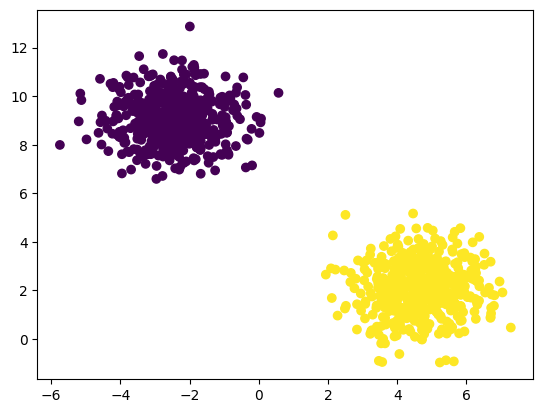

In [142]:
dataset_size = 1000
classes = 2
X, y = make_blobs(n_samples=dataset_size, centers=classes, n_features=2, random_state=42)
X.shape, y.shape
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [143]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [144]:
epochs = 150
learning_rate = 0.01

model = LogisticRegression(X_train, y_train, 42)
model.train(epochs, learning_rate)

Round: 0. Loss: 4.168813092762638. New Weights: [0.37454012 0.95071431]. New bias: 0.7319939418114051
Round: 10. Loss: 3.1759277122752474. New Weights: [0.55226182 0.77830218]. New bias: 0.7319939235741617
Round: 20. Loss: 2.197733261068735. New Weights: [0.73024283 0.60731335]. New bias: 0.7316775219223923
Round: 30. Loss: 1.3021787187030278. New Weights: [0.90550344 0.44481313]. New bias: 0.7302979851047183
Round: 40. Loss: 0.6801188628495144. New Weights: [1.06967655 0.31482037]. New bias: 0.7251997869936742
Round: 50. Loss: 0.3836610662277428. New Weights: [1.21786605 0.23609147]. New bias: 0.7143861381640746
Round: 60. Loss: 0.25562584406364747. New Weights: [1.3551407  0.19631845]. New bias: 0.6992732313555773
Round: 70. Loss: 0.19423640458246375. New Weights: [1.48659576 0.17907607]. New bias: 0.6816795278288821
Round: 80. Loss: 0.1611768460660013. New Weights: [1.61485326 0.17483043]. New bias: 0.6626535267929717
Round: 90. Loss: 0.14187711793151422. New Weights: [1.74119962 0.

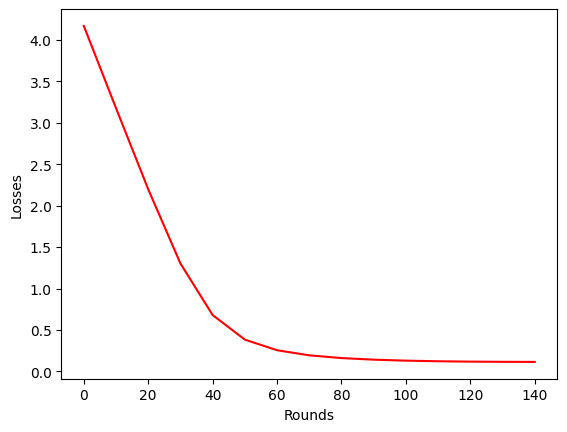

In [152]:
# Visualize the model's performance
plt.xlabel('Rounds')
plt.ylabel('Losses')
plt.plot(model.losses.keys(), model.losses.values(), c='red')